# Tarea 7
### En este notebook se realizarán las comprobaciones correspondientes a la tarea 7, todo el codigo y los resultados hayados servirá para la realización del informe.

En los procesos de entrenamiento de un clasificador, es importante llevar a cabo una evaluación cuidadosa para analizar su desempeño. Esto implica modificar de manera sistemática las dos muestras principales (entrenamiento y prueba) con el fin de obtener una evaluación más específica sobre el comportamiento del clasificador.

Para ello, utilizamos métricas aplicadas a conjuntos de datos que hemos dividido en dos subconjuntos mutuamente excluyentes mediante el método train_test_split. Sin embargo, esta estrategia puede generar desviaciones en la estimación del error.

Para abordar esta limitación, se utiliza el método de validación cruzada (cross-validation, leave-one-out). Este enfoque parte de un conjunto de datos con m muestras, y el clasificador se entrena con m-1 de ellas, reservando una muestra para la evaluación (de ahí el nombre "dejar una fuera"). Este procedimiento se repite m veces, alternando la muestra que se deja fuera en cada iteración, lo que permite obtener una evaluación más robusta y precisa del rendimiento del clasificador.

En esta tarea realizaremos una validación cruzada con el perceptrón simple y otra con el perceptrón multicapa y compararemos sus métricas y resultados.

#### Obtención de los datos para la validación cruzada
Se usarán los datos que contenian solo las imágenes con la letra A y el numero 3

In [1]:
from Funciones.Funciones_prop import carga_data_MNIST  #Importamos dicha función
from Funciones.Tarea_1 import crea_diccionario 
from Funciones.Tarea_2 import getdataset

#Cargamos los datos en las variables images y labels
input_path = 'Data'
file_images = 'emnist-balanced-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-labels-idx1-ubyte.gz'

[images, labels] = carga_data_MNIST(input_path, file_images, file_labels)


#Creamos el diccionario caracteres
archivo_claves = "Data\\claves_ASCII.txt"
caracteres = crea_diccionario(archivo_claves)

#Obtenemso Ximage e yimage
Ximage, yimage= getdataset(images,labels, caracteres, 16)

#Utilizamos una mascara para filtrar los datasets
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))]

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************


### Hacemos la validación cruzada del perceptrón simple

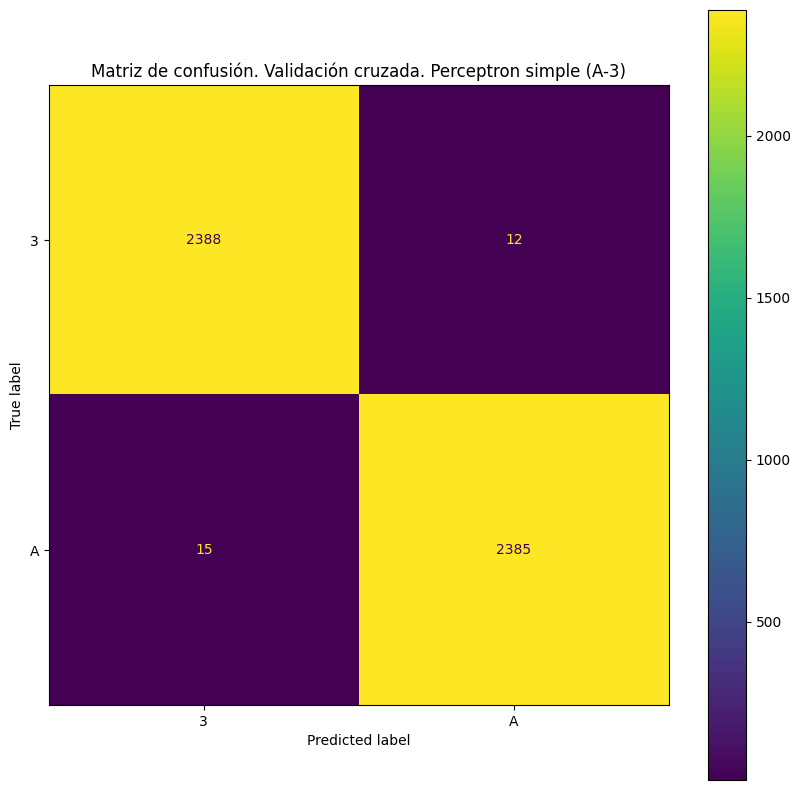

Porcentaje de acierto: 0.994375
Exactitud: 0.994375
Precisión: [0.9937578  0.99499374]
Sensibilidad: [0.995   0.99375]


In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn import metrics
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from Funciones.Tarea_3 import evalua
#Hacemos la validación cruzada con el perceptrón simple
y_2C_pred = cross_val_predict(Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False), X_2C, y_2C, cv=3)
#Creamos la matriz de confusión
labels=np.unique(y_2C)
conf_mat = confusion_matrix(y_2C, y_2C_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión. Validación cruzada. Perceptron simple (A-3)")
plt.show()

#Mostramos las métricas
porcentaje_acierto=evalua(y_2C, y_2C_pred)
print("Porcentaje de acierto: " + str(porcentaje_acierto))
accuracy=metrics.accuracy_score(y_2C, y_2C_pred)
print("Exactitud: " + str(accuracy))
precision =metrics.precision_score(y_2C,y_2C_pred,average=None)
print("Precisión: " + str(precision))
sensibilidad =metrics.recall_score(y_2C, y_2C_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))

### Hacemos la validación cruzada del perceptrón multicapa

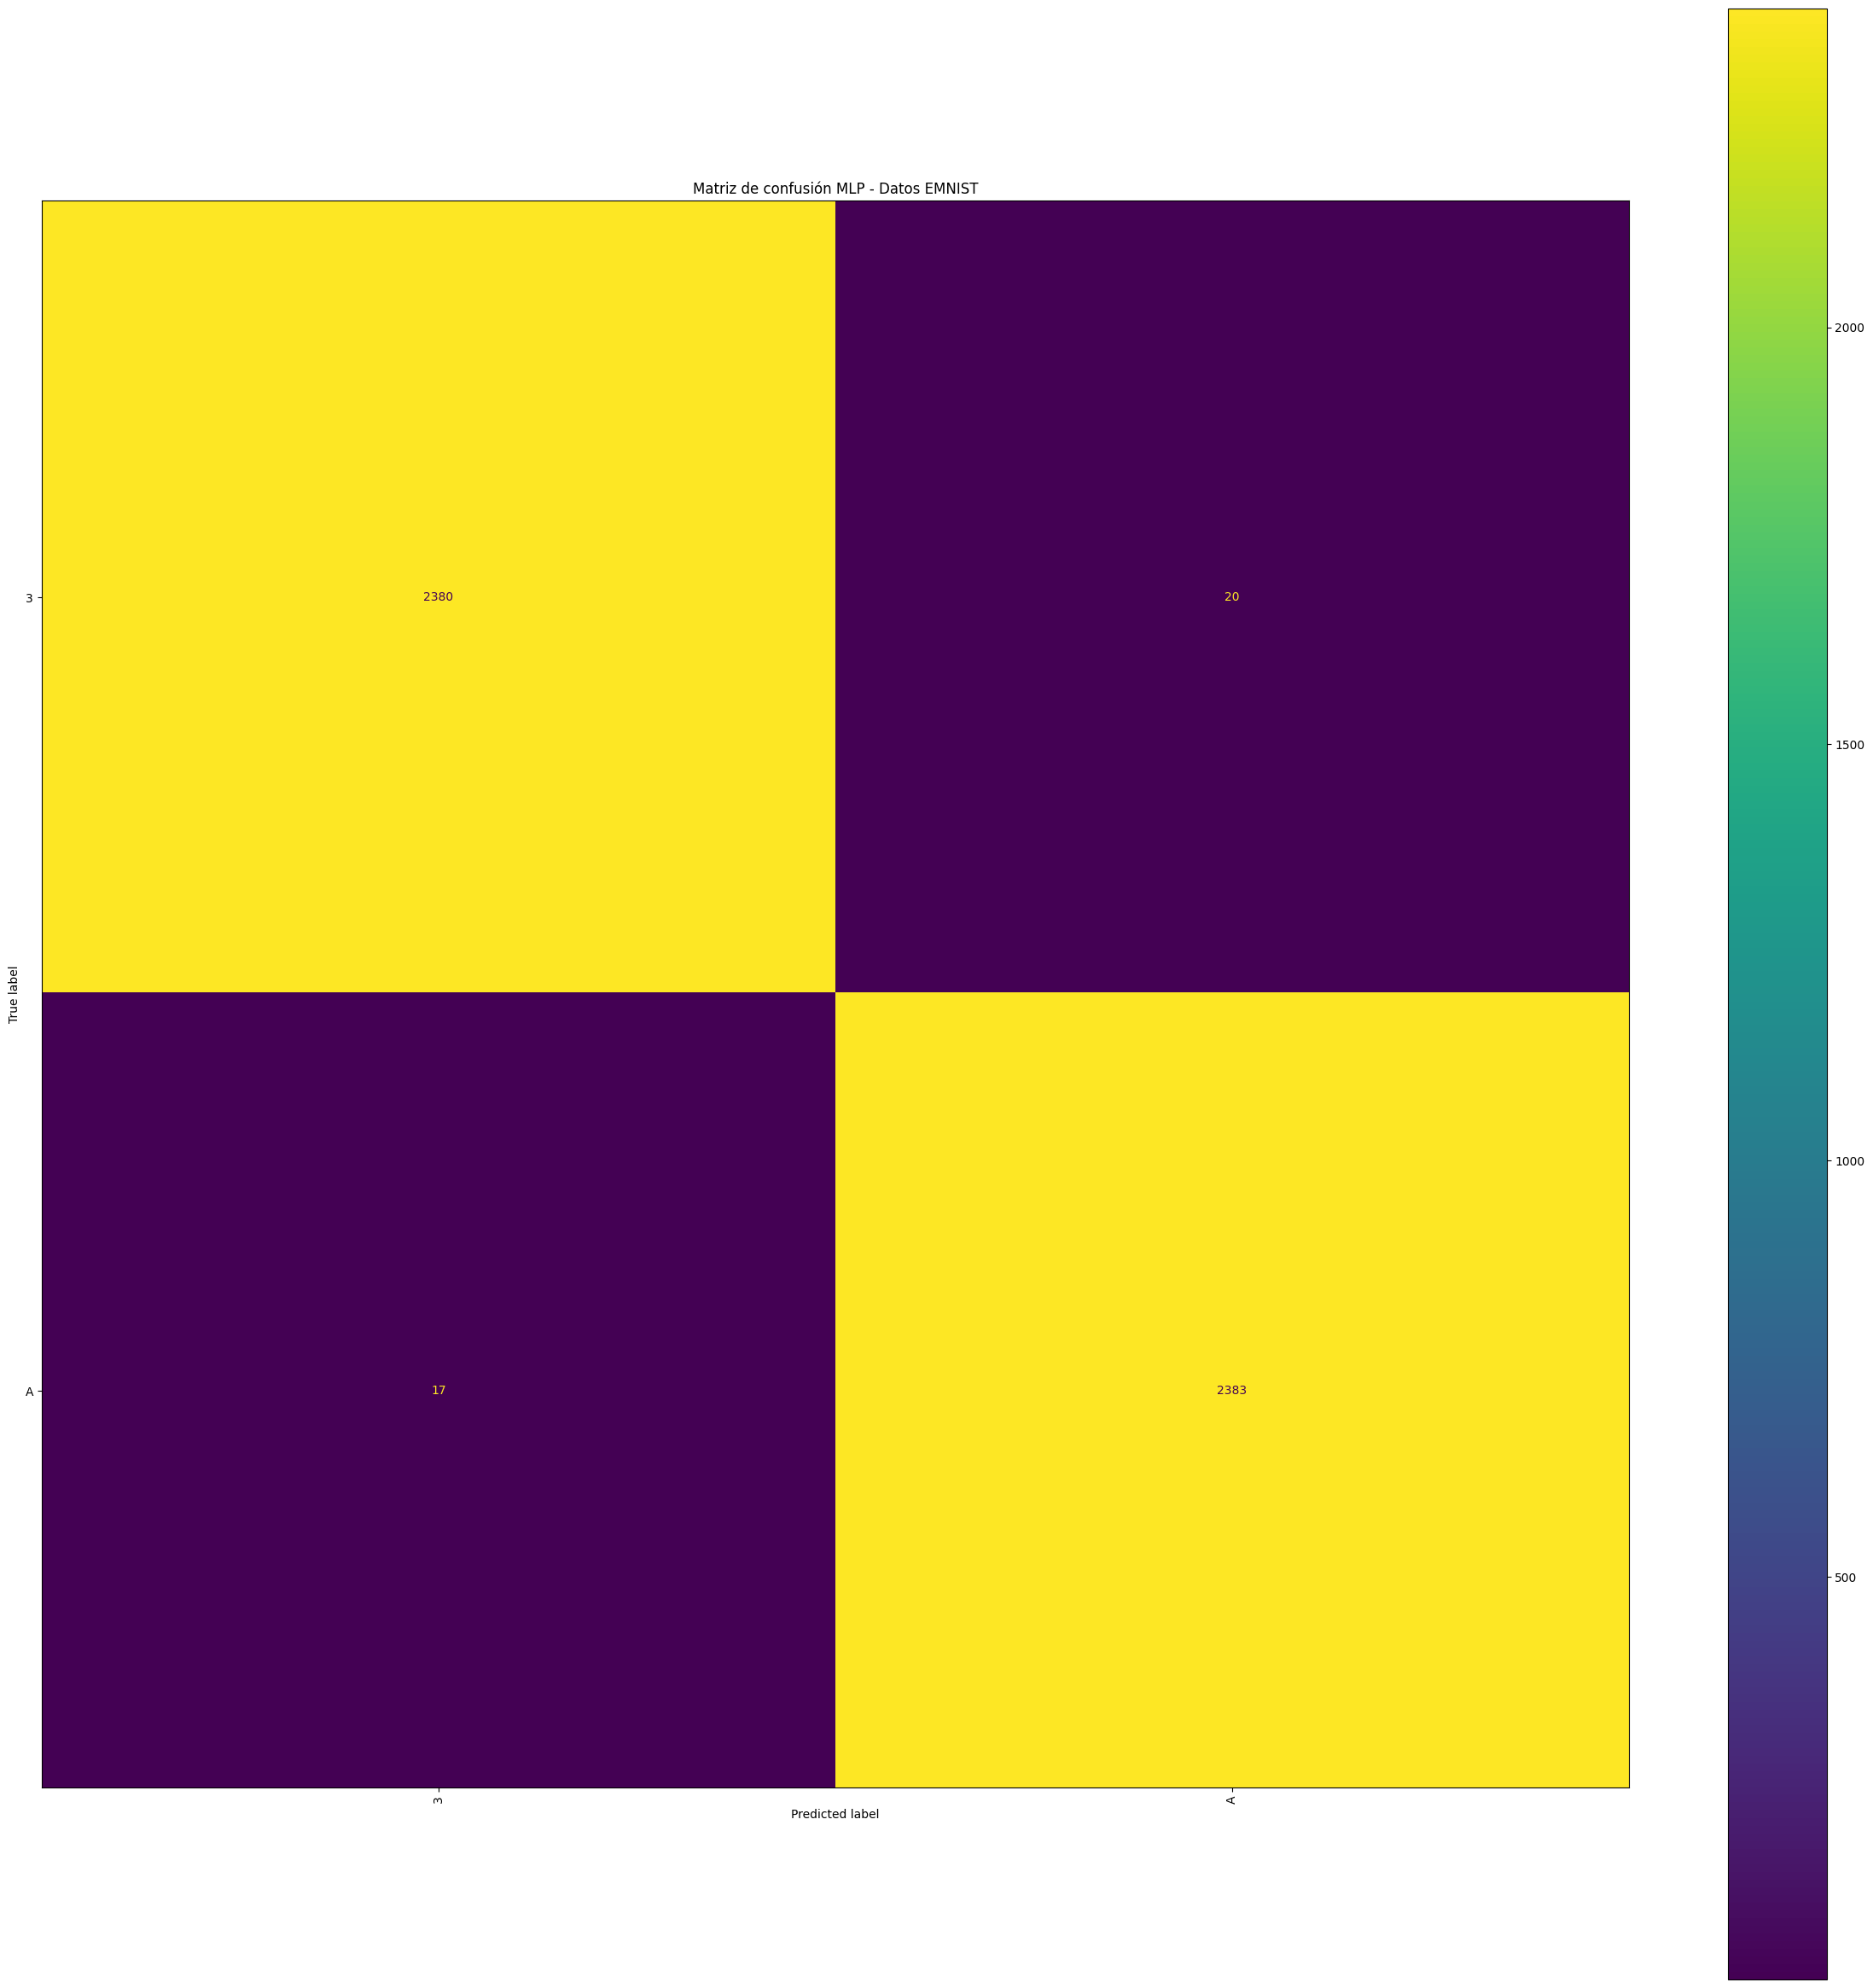

Exactitud: 0.9922916666666667
Precisión: [0.9929078  0.99167707]
Sensibilidad: [0.99166667 0.99291667]


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
#Hacemos la validación cruzada con el perceptrón multicapa
y_pred = cross_val_predict(MLPClassifier(), X_2C, y_2C, cv=3)
#Cramos la matriz de confusión
labels=np.unique(y_2C)
conf_mat = confusion_matrix(y_2C, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(30,30))
cm_display.plot(ax=ax)
plt.xticks(rotation='vertical')
plt.title("Matriz de confusión MLP - Datos EMNIST")
plt.show()

#Mostramos las métricas
accuracy=metrics.accuracy_score(y_2C, y_pred)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(y_2C, y_pred,average=None) 
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(y_2C, y_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))